In [197]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

In [198]:
FILE_PATH = "numerical.csv"

In [199]:
df = pd.read_csv(FILE_PATH, encoding='utf-8')

In [200]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2,170.0,False,Li-Ion,3400.0,4,1.30,13,2,32
1,Acer,Liquid Z6 Plus,Android,3,250.0,True,Li-Po,4080.0,8,1.30,13,5,32
2,Acer,Liquid Z6,Android,1,120.0,True,Li-Ion,2000.0,4,1.25,8,2,8
3,Acer,Iconia Tab 10 A3-A40,Android,2,230.0,False,Li-Ion,NaN,4,1.30,5,2,64
4,Acer,Liquid X2,Android,3,230.0,True,Li-Po,4020.0,8,1.30,13,13,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,ZTE,Optik,Android,1,230.0,False,Li-Ion,4000.0,2,1.20,5,2,16
2486,ZTE,Light Tab 2 V9A,Android,512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,VGA,4
2487,ZTE,Tania,Microsoft,512,210.0,True,Li-Ion,1400.0,1,1.00,5,No,4
2488,ZTE,Blade,Android,512,170.0,True,Li-Ion,1250.0,1,0.60,3.15,No,512


## Eliminar nan

In [201]:
df = df.dropna()

In [202]:
df

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2,170.0,False,Li-Ion,3400.0,4,1.30,13,2,32
1,Acer,Liquid Z6 Plus,Android,3,250.0,True,Li-Po,4080.0,8,1.30,13,5,32
2,Acer,Liquid Z6,Android,1,120.0,True,Li-Ion,2000.0,4,1.25,8,2,8
4,Acer,Liquid X2,Android,3,230.0,True,Li-Po,4020.0,8,1.30,13,13,32
5,Acer,Liquid Zest Plus,Android,2,200.0,False,Li-Ion,5000.0,4,1.30,13,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,ZTE,Optik,Android,1,230.0,False,Li-Ion,4000.0,2,1.20,5,2,16
2486,ZTE,Light Tab 2 V9A,Android,512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,VGA,4
2487,ZTE,Tania,Microsoft,512,210.0,True,Li-Ion,1400.0,1,1.00,5,No,4
2488,ZTE,Blade,Android,512,170.0,True,Li-Ion,1250.0,1,0.60,3.15,No,512


### Convertir columnas str a valores numéricos

In [203]:
cols = ['brand', 'OS', 'battery_removable', 'battery_type', 'primary_camera_mp']

In [204]:
le = preprocessing.LabelEncoder()

# apply "le.fit_transform"
df_encoded = df[cols].apply(le.fit_transform)

In [205]:
df_encoded

,brand,OS,battery_removable,battery_type,primary_camera_mp
0,0,1,0,0,8
1,0,1,1,1,8
2,0,1,1,0,34
4,0,1,1,1,8
5,0,1,0,0,8
...,...,...,...,...,...
2485,60,1,0,0,32
2486,60,1,0,0,29
2487,60,10,1,0,32
2488,60,1,1,0,28


In [206]:
df_numerical = df.drop(cols, axis=1)
df_numerical

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,secondary_camera_mp,internal_memory_gb
0,Iconia Talk S,2,170.0,3400.0,4,1.30,2,32
1,Liquid Z6 Plus,3,250.0,4080.0,8,1.30,5,32
2,Liquid Z6,1,120.0,2000.0,4,1.25,2,8
4,Liquid X2,3,230.0,4020.0,8,1.30,13,32
5,Liquid Zest Plus,2,200.0,5000.0,4,1.30,5,16
...,...,...,...,...,...,...,...,...
2485,Optik,1,230.0,4000.0,2,1.20,2,16
2486,Light Tab 2 V9A,512,250.0,3400.0,1,1.40,VGA,4
2487,Tania,512,210.0,1400.0,1,1.00,No,4
2488,Blade,512,170.0,1250.0,1,0.60,No,512


In [207]:
categorical_df = df_numerical.join(df_encoded)

In [208]:
categorical_df

,model,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type,primary_camera_mp
0,Iconia Talk S,2,170.0,3400.0,4,1.30,2,32,0,1,0,0,8
1,Liquid Z6 Plus,3,250.0,4080.0,8,1.30,5,32,0,1,1,1,8
2,Liquid Z6,1,120.0,2000.0,4,1.25,2,8,0,1,1,0,34
4,Liquid X2,3,230.0,4020.0,8,1.30,13,32,0,1,1,1,8
5,Liquid Zest Plus,2,200.0,5000.0,4,1.30,5,16,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Optik,1,230.0,4000.0,2,1.20,2,16,60,1,0,0,32
2486,Light Tab 2 V9A,512,250.0,3400.0,1,1.40,VGA,4,60,1,0,0,29
2487,Tania,512,210.0,1400.0,1,1.00,No,4,60,10,1,0,32
2488,Blade,512,170.0,1250.0,1,0.60,No,512,60,1,1,0,28


In [209]:
df_clases = categorical_df.drop('model', axis=1)
df_clases

,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,secondary_camera_mp,internal_memory_gb,brand,OS,battery_removable,battery_type,primary_camera_mp
0,2,170.0,3400.0,4,1.30,2,32,0,1,0,0,8
1,3,250.0,4080.0,8,1.30,5,32,0,1,1,1,8
2,1,120.0,2000.0,4,1.25,2,8,0,1,1,0,34
4,3,230.0,4020.0,8,1.30,13,32,0,1,1,1,8
5,2,200.0,5000.0,4,1.30,5,16,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2485,1,230.0,4000.0,2,1.20,2,16,60,1,0,0,32
2486,512,250.0,3400.0,1,1.40,VGA,4,60,1,0,0,29
2487,512,210.0,1400.0,1,1.00,No,4,60,10,1,0,32
2488,512,170.0,1250.0,1,0.60,No,512,60,1,1,0,28


# Normalizar

In [210]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
from sklearn.decomposition import PCA




X = df_clases[['approx_price_EUR', 'CPU_speed', 'battery_mah', 'primary_camera_mp']]
y = df_clases['CPU_cores']


In [211]:
X

,approx_price_EUR,CPU_speed,battery_mah,primary_camera_mp
0,170.0,1.30,3400.0,8
1,250.0,1.30,4080.0,8
2,120.0,1.25,2000.0,34
4,230.0,1.30,4020.0,8
5,200.0,1.30,5000.0,8
...,...,...,...,...
2485,230.0,1.20,4000.0,32
2486,250.0,1.40,3400.0,29
2487,210.0,1.00,1400.0,32
2488,170.0,0.60,1250.0,28


In [212]:
target_names = pd.unique(df_clases['CPU_cores'])

In [213]:
target_names

array([ 4,  8,  6,  2,  1,  3, 10])

In [214]:
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.11885344, -0.173833  ,  0.51843374, -1.46438852],
       [ 0.00408603, -0.173833  ,  0.99557501, -1.46438852],
       [-0.19569061, -0.28752915, -0.46391593,  0.83174034],
       ...,
       [-0.0573837 , -0.85600989, -0.88492293,  0.65511504],
       [-0.11885344, -1.76557907, -0.99017468,  0.30186445],
       [-0.10348601, -1.76557907, -1.09542643,  0.30186445]])

# PCA

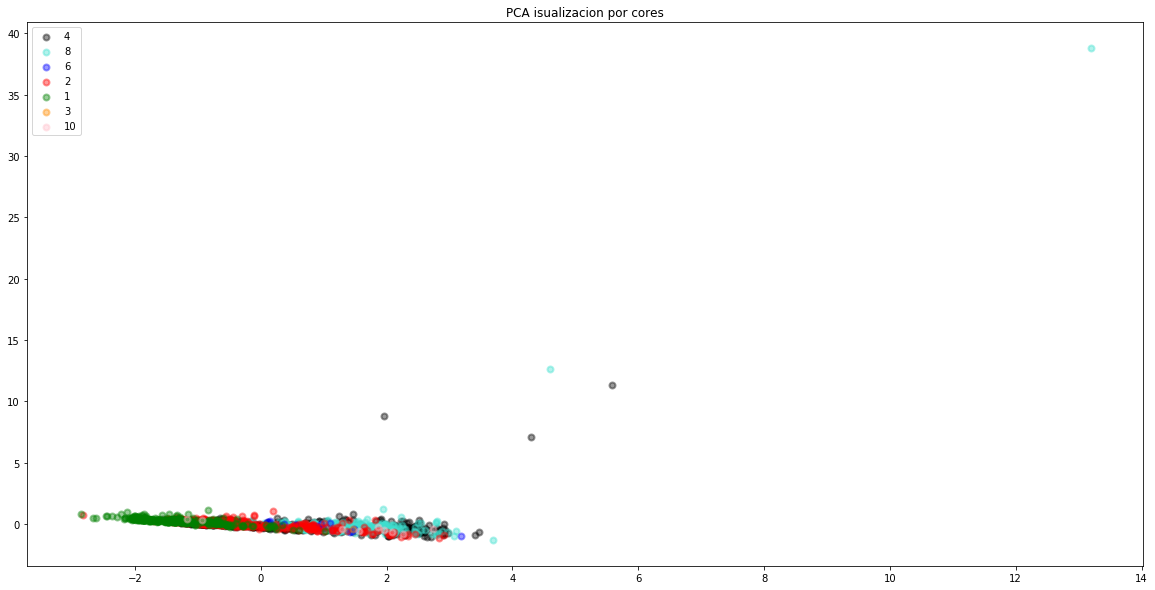

In [215]:


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA isualizacion por cores')
plt.show()

# Isomap

In [216]:
from sklearn import manifold

In [221]:
n_neighbors = 20
X_iso = manifold.Isomap(n_neighbors=n_neighbors, 
                        n_components=2).fit_transform(X)

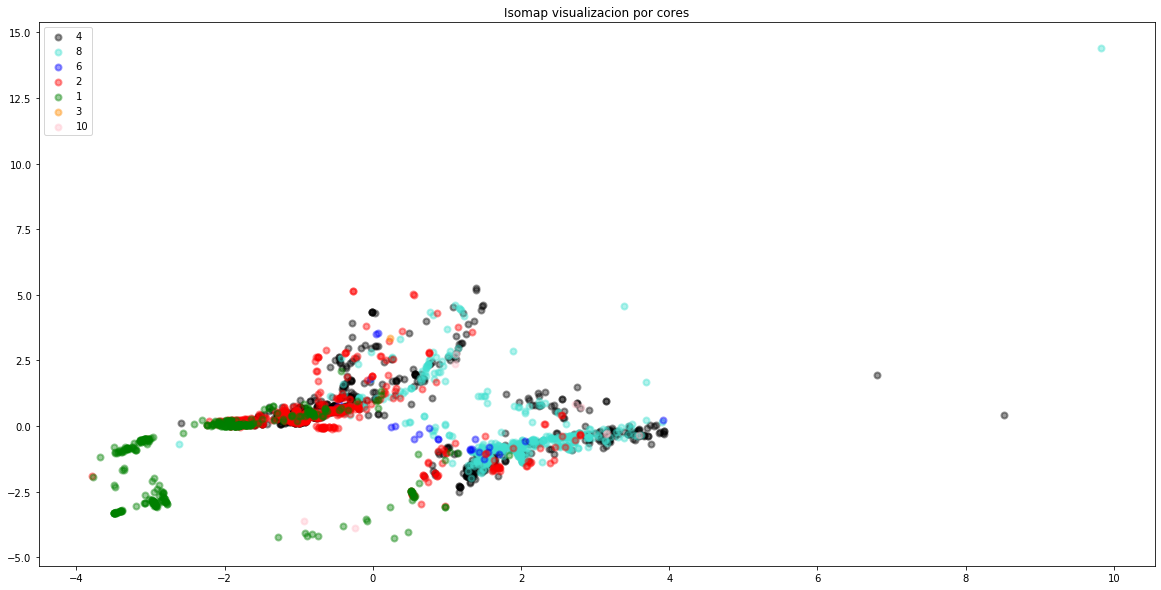

In [222]:

plt.figure(figsize=(20, 10))
lw = 2
colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'pink']

for color, i, target_name in zip(colors, target_names, target_names):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], color=color, alpha=.4, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Isomap visualizacion por cores')
plt.show()